# Project 1: Email Classifier
### CS 4981 ML Production Systems
### Kyle Robinson, Michael Salgado, Noah Stiemke

## Introduction
In this lab/experiment we were tasked with experimenting on machine learning models that classify spam emails. To do this we were given a dataset of about 65000 emails, which was split into two parts, one for testing, and one for training. Using the data, the feature data must be extracted from the JSON files and put into a data frame, this data frame will then be used to train the model. Once the models were trained and functioning correctly the results of each of the models should be gathered and an ROC curve generated to visualize the model's performance.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

## Loading JSONs from 'email_json_dataset1' folder into Python dictionaries


In [2]:
pathname = 'C:/Users/salgadom/Documents/CS4981/Project 1/email_json_dataset1/'

json_files = [pos_json for pos_json in os.listdir(pathname) if pos_json.endswith('.json')]

dicts = []
for filename in json_files:
    with open(pathname + filename) as json_file:
        dicts.append(json.load(json_file))

print(dicts[0])

{'label': 'spam', 'to_address': 'the00@speedy.uwaterloo.ca', 'from_address': '"Tomas Jacobs" <RickyAmes@aol.com>', 'subject': 'Generic Cialis, branded quality@ ', 'body': '\n\n\n\n\n\n\nDo you feel the pressure to perform and not rising to the occasion??\n\n\n\n\nTry Viagra.....\nyour anxiety will be a thing of the past and you will\nbe back to your old self.\n\n'}


## Creating Pandas DataFrame from JSON dictionary

In [3]:
df = pd.DataFrame.from_dict(dicts)
df.head()

,label,to_address,from_address,subject,body
0,spam,the00@speedy.uwaterloo.ca,"""Tomas Jacobs"" <RickyAmes@aol.com>","Generic Cialis, branded quality@",\n\n\n\n\n\n\nDo you feel the pressure to perf...
1,ham,debian-mirrors@lists.debian.org,Yan Morin <yan.morin@savoirfairelinux.com>,Typo in /debian/README,"Hi, i've just updated from the gulus and I che..."
2,spam,<the00@plg.uwaterloo.ca>,"""Sheila Crenshaw"" <7stocknews@tractionmarketin...",authentic viagra,authentic viagra\n\nMega authenticV I A G R A...
3,spam,opt4@speedy.uwaterloo.ca,"""Stormy Dempsey"" <vqucsmdfgvsg@ruraltek.com>",Nice talking with ya,"\nHey Billy, \n\nit was really fun going out t..."
4,spam,ktwarwic@speedy.uwaterloo.ca,"""Christi T. Jernigan"" <dcube@totalink.net>",or trembling; stomach cramps; trouble in sleep...,"\n\n\n\n\n\n\nsystem"" of the home. It will ha..."


In [4]:
print(len(df))

63542


## Getting column names and types
Columns are label, to_address, from_address, subject, and body. Each of these columns contain String types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63542 entries, 0 to 63541
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         63542 non-null  object
 1   to_address    63141 non-null  object
 2   from_address  63542 non-null  object
 3   subject       63410 non-null  object
 4   body          63542 non-null  object
dtypes: object(5)
memory usage: 2.4+ MB


## Adjusting class balance

In [6]:
print(f"Original number of spam labels: {df['label'].value_counts()['spam']}")
print(f"Original number of ham labels: {df['label'].value_counts()['ham']}")

g = df.groupby('label')
df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
print(f"\nAdjusted number of spam labels: {df['label'].value_counts()['spam']}")
print(f"Adjusted number of ham labels: {df['label'].value_counts()['ham']}")

Original number of spam labels: 40450
Original number of ham labels: 23092

Adjusted number of spam labels: 23092
Adjusted number of ham labels: 23092


## Vectorizing the training dataset

In [7]:
vectorizer = CountVectorizer(min_df=10)
counts = vectorizer.fit_transform(df['body'].values)

## Splitting dataset into training/testing sets (80/20)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(counts, df['label'], test_size=0.2)

## Evaluating feature matrix


In [9]:
print(f"Number of rows: {counts.shape[0]}")
print(f"Number of columns: {counts.shape[1]}")
print(f"Number of non-zero entries: {counts.count_nonzero()}")

Number of rows: 46184
Number of columns: 28283
Number of non-zero entries: 4916963


## Logistic Regression Model
### Fitting Logistic Regression Model

In [10]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

### Evaluating Logistic Regression Model Performance
accuracy: 0.9611345675002706

precision: 0.933589795505163

recall: 0.9933218440327445

In [11]:
lr_pred = lr.predict(x_test)
print(f"accuracy: {accuracy_score(y_test, lr_pred)}")
print(f"precision: {precision_score(y_test, lr_pred, pos_label='spam')}")
print(f"recall: {recall_score(y_test, lr_pred, pos_label='spam')}")

accuracy: 0.9590776226047418
precision: 0.9297221103503825
recall: 0.9937580714593198


### Calculate ROC curve and ROC area for the logistic regression model


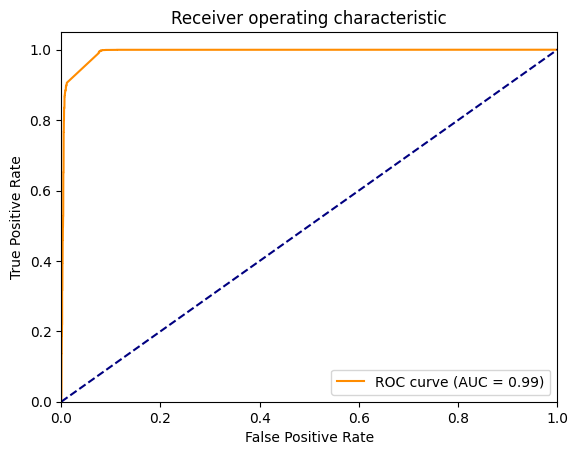

In [12]:
lr_pred_proba = lr.predict_proba(x_test)[:,1] # Get the predicted probabilities for the positive class

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr_pred_proba, pos_label='spam')
lr_roc_auc = roc_auc_score(y_test, lr_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(lr_fpr, lr_tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % lr_roc_auc)
# plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes Model
### Fitting NB Model

In [13]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

### Evaluating NB Model Performance
accuracy: 0.9342860236007362

precision: 0.9879401833092137

recall: 0.8802922845476037

In [14]:
nb_pred = nb_classifier.predict(x_test)
print(f"accuracy: {accuracy_score(y_test, nb_pred)}")
print(f"precision: {precision_score(y_test, nb_pred, pos_label='spam')}")
print(f"recall: {recall_score(y_test, nb_pred, pos_label='spam')}")

accuracy: 0.9338529825700985
precision: 0.9900412922030605
recall: 0.8773138183383555


### Calculate ROC curve and ROC area for the logistic regression model


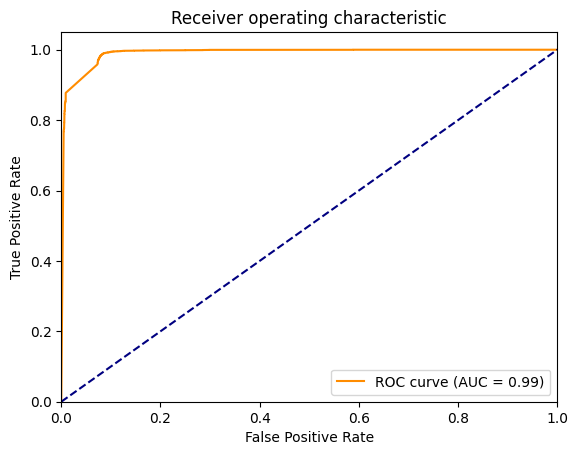

In [15]:
nb_pred_proba = nb_classifier.predict_proba(x_test)[:,1] # Get the predicted probabilities for the positive class

nb_fpr, nb_tpr, thresholds = roc_curve(y_test, nb_pred_proba, pos_label='spam')
nb_roc_auc = roc_auc_score(y_test, nb_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(nb_fpr, nb_tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % nb_roc_auc)
# plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Conclusion
Using the data from 63, 452 emails we built a simple classifier that takes care of several procedures for loading and processing email bodies. Our model classifies email as either ‘spam’ or ‘ham’ by evaluating the individual words in each message. Our dataset skewed towards spam labels, so we downsized our spam set into a subset of random samples from the original until it matched the size of our ham set. We used 80% of our data for training and 20% for testing and validation. We utilized a logistic regression model since it is known to provide one of the highest accuracies in proportion to its performance for training and prediction. We again evaluated the model using the Naïve Bayes Model to for a comparison of the two. In the end we found:
| | Logistic Regression | Naïve Bayes |
| --- | --- | --- |
| Accuracy | 96.113% | 93.428% |
| Precision | 93.358% | 98.794% |
| Recall | 99.332% | 88.029% |

We can confirm that the logistic regression model performs better at classifying our emails after observing the receiver operating characteristics we could see that it had a higher true positive rate versus the Naïve Bayes model.

